In [1]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [2]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [4]:
df = pd.read_csv('nestle.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


Date - dtype - Object

Open Price - dtype - float64

High Price - dtype - float64

Low Price - dtype - float64

Close Price - dtype -float64

WAP(Weighted average price) - type -float64

No.of Shares- dtype- int64

No. of Trades -dtype -int64

Total Turnover (Rs.) -dtype - float64

Deliverable Quantity -dtype- float64

% Deli. Qty to Traded Qty - dtype- float64

Spread High-Low -dtype - float64

Spread Close-Open - dtype - float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [6]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2.553000e+03,2551.000000,2551.000000,2553.000000,2553.000000
mean,9338.023188,9429.710419,9226.855934,9324.960556,9327.503179,5521.380337,1004.099491,4.761923e+07,3264.052528,49.024461,202.854485,-13.062632
std,4940.554627,4986.783271,4878.971233,4932.776537,4929.373727,10416.942384,1137.547557,8.502888e+07,8652.860793,19.119739,174.985173,157.849187
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5391.000000,5445.000000,5327.200000,5383.500000,5385.347807,1572.000000,442.000000,1.172133e+07,653.500000,35.575000,88.850000,-71.700000
50%,6804.000000,6868.900000,6747.300000,6809.950000,6813.150538,2618.000000,731.000000,2.222074e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13299.950000,13690.950000,12850.000000,13455.450000,13387.505382,4981.000000,1199.000000,4.938465e+07,2225.500000,59.130000,263.150000,48.300000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%B-%Y")

In [11]:

# Create a new column for the quarter
df['Quarter'] = df['Date'].dt.quarter
# Create new columns for month, week, and season
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Define a function to get the season based on the month
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create the 'Season' column
df['Season'] = df['Date'].dt.month.apply(get_season)

In [12]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Quarter,Month,Week,Season
0,2022-04-21,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,2,4,16,Spring
1,2022-04-20,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,2,4,16,Spring
2,2022-04-19,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,2,4,16,Spring
3,2022-04-18,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,2,4,16,Spring
4,2022-04-13,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,2,4,15,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2012-01-06,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25,1,1,1,Winter
2549,2012-01-05,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15,1,1,1,Winter
2550,2012-01-04,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60,1,1,1,Winter
2551,2012-01-03,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35,1,1,1,Winter


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2553 non-null   datetime64[ns]
 1   Open Price                 2553 non-null   float64       
 2   High Price                 2553 non-null   float64       
 3   Low Price                  2553 non-null   float64       
 4   Close Price                2553 non-null   float64       
 5   WAP                        2553 non-null   float64       
 6   No.of Shares               2553 non-null   int64         
 7   No. of Trades              2553 non-null   int64         
 8   Total Turnover (Rs.)       2553 non-null   float64       
 9   Deliverable Quantity       2551 non-null   float64       
 10  % Deli. Qty to Traded Qty  2551 non-null   float64       
 11  Spread High-Low            2553 non-null   float64       
 12  Spread

In [15]:
df.dropna()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Quarter,Month,Week,Season
0,2022-04-21,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,2,4,16,Spring
1,2022-04-20,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,2,4,16,Spring
2,2022-04-19,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,2,4,16,Spring
3,2022-04-18,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,2,4,16,Spring
4,2022-04-13,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,2,4,15,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2012-01-06,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25,1,1,1,Winter
2549,2012-01-05,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15,1,1,1,Winter
2550,2012-01-04,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60,1,1,1,Winter
2551,2012-01-03,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35,1,1,1,Winter


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2553 non-null   datetime64[ns]
 1   Open Price                 2553 non-null   float64       
 2   High Price                 2553 non-null   float64       
 3   Low Price                  2553 non-null   float64       
 4   Close Price                2553 non-null   float64       
 5   WAP                        2553 non-null   float64       
 6   No.of Shares               2553 non-null   int64         
 7   No. of Trades              2553 non-null   int64         
 8   Total Turnover (Rs.)       2553 non-null   float64       
 9   Deliverable Quantity       2551 non-null   float64       
 10  % Deli. Qty to Traded Qty  2551 non-null   float64       
 11  Spread High-Low            2553 non-null   float64       
 12  Spread

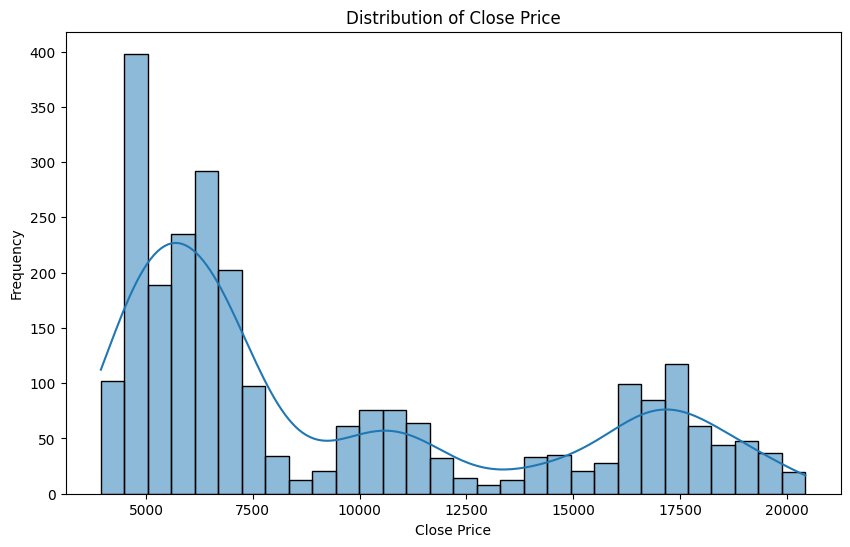

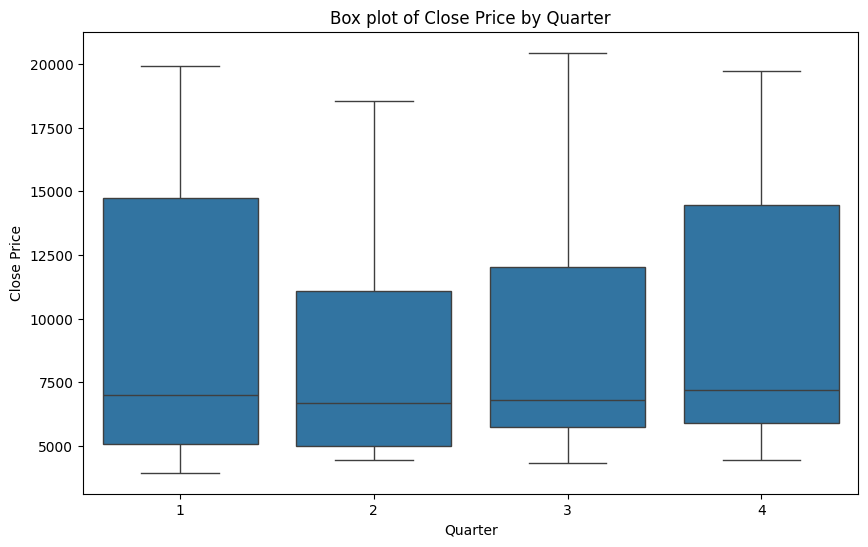

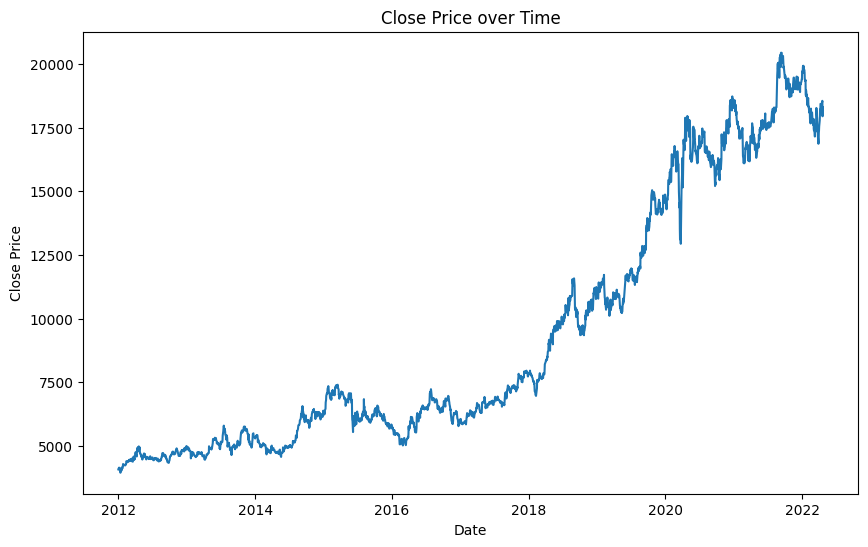

In [18]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Close Price'], bins=30, kde=True) #kernel density estimate curve
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarter', y='Close Price', data=df)
plt.title('Box plot of Close Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Close Price')
plt.show()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close Price', data=df)
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()



<ipython-input-19-d58e4f39cc15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


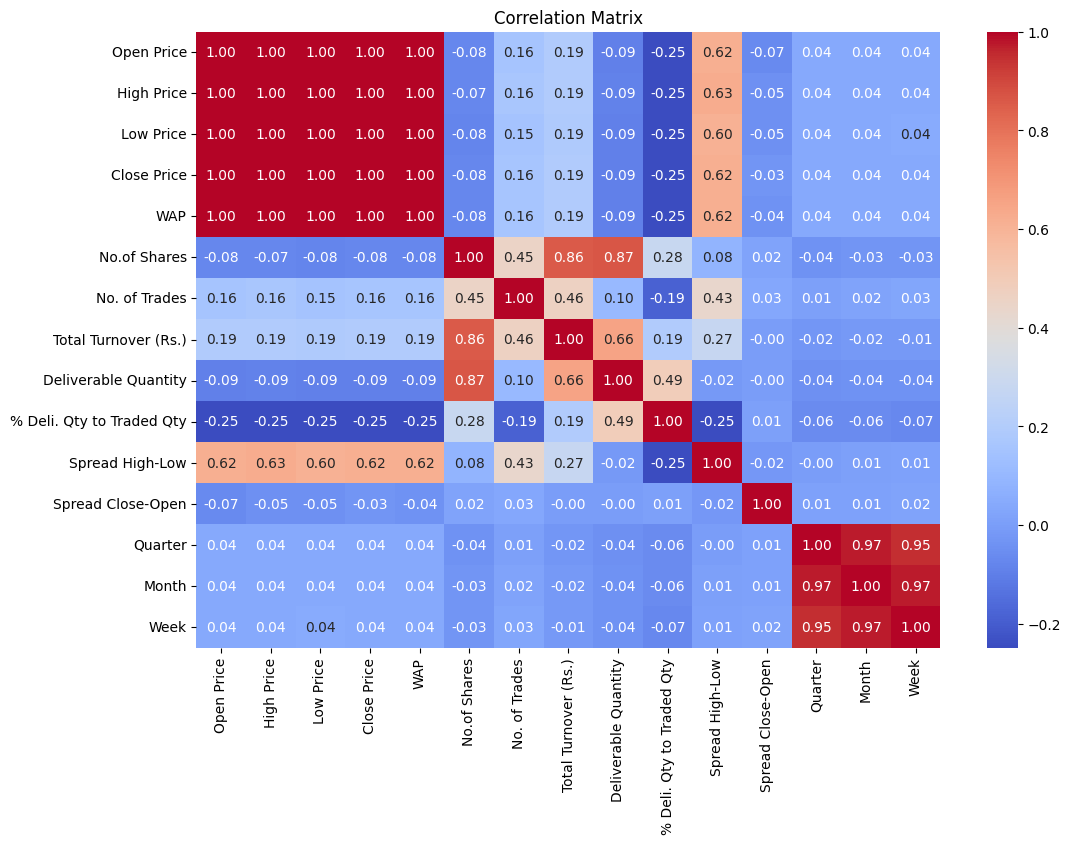

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [21]:
# Aggregate metrics by quarter
quarterly_metrics = df.groupby('Quarter').mean()
print(quarterly_metrics)




          Open Price   High Price    Low Price  Close Price          WAP  \
Quarter                                                                    
1        9264.519868  9352.481012  9144.968768  9246.376833  9247.517715   
2        8974.881579  9071.281180  8870.259569  8965.934051  8971.274358   
3        9334.231190  9421.679683  9228.302857  9320.285714  9322.466024   
4        9794.388029  9889.751059  9680.473860  9783.672068  9785.286511   

         No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Quarter                                                      
1         5860.480938     934.775660          5.043593e+07   
2         5867.628389    1096.534290          4.803654e+07   
3         5677.260317    1013.636508          4.729691e+07   
4         4631.203583     976.923453          4.439515e+07   

         Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
Quarter                                                                     
1               

<ipython-input-21-bf5629fdbd4e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_metrics = df.groupby('Quarter').mean()


In [22]:
# Aggregate metrics by month
monthly_metrics = df.groupby('Month').mean()
print(monthly_metrics)


        Open Price    High Price    Low Price  Close Price          WAP  \
Month                                                                     
1      9339.866597   9409.770378  9237.863655  9314.538025  9321.402886   
2      9319.431422   9400.725229  9198.994037  9290.842890  9297.678559   
3      9132.204646   9245.613274  8995.028540  9131.704425  9121.324197   
4      9307.561823   9417.476847  9188.769951  9299.572906  9303.590669   
5      8622.599531   8715.397887  8521.829108  8614.999531  8620.233706   
6      9010.436019   9097.468009  8915.558531  8999.205924  9005.925769   
7      9130.290909   9206.142727  9042.695000  9120.231364  9121.045492   
8      9357.557005   9456.385990  9256.588406  9353.113285  9356.892666   
9      9531.464778   9619.876355  9400.611330  9503.618966  9505.649288   
10     9607.115423   9707.905721  9494.988060  9603.285572  9603.542723   
11     9793.445750   9887.232250  9665.117000  9772.503250  9776.646064   
12     9971.994836  10063

<ipython-input-22-6485613322d0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_metrics = df.groupby('Month').mean()


In [23]:

# Aggregate metrics by season
seasonal_metrics = df.groupby('Season').mean()
print(seasonal_metrics)

         Open Price   High Price    Low Price  Close Price          WAP  \
Season                                                                    
Autumn  9643.388576  9737.699338  9519.602815  9625.820695  9627.960439   
Spring  9018.577882  9124.043847  8899.293380  9013.354206  9012.707093   
Summer  9164.389185  9251.393495  9070.046317  9155.764577  9159.493930   
Winter  9534.468161  9615.030045  9426.438266  9513.718087  9518.553708   

        No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Season                                                      
Autumn   5406.819536    1042.514901          4.935856e+07   
Spring   5143.384735     961.172897          4.325291e+07   
Summer   6305.133229    1161.927900          5.161295e+07   
Winter   5240.115097     860.095665          4.643032e+07   

        Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
Season                                                                     
Autumn           3314.915563  

<ipython-input-23-83371778a09e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_metrics = df.groupby('Season').mean()


In [24]:
correlation_matrix = df.corr()
print(correlation_matrix['Close Price'].sort_values(ascending=False))


Close Price                  1.000000
WAP                          0.999927
High Price                   0.999793
Low Price                    0.999761
Open Price                   0.999490
Spread High-Low              0.616866
Total Turnover (Rs.)         0.191751
No. of Trades                0.156813
Week                         0.044009
Quarter                      0.043376
Month                        0.043351
Spread Close-Open           -0.033314
No.of Shares                -0.075764
Deliverable Quantity        -0.093174
% Deli. Qty to Traded Qty   -0.246861
Name: Close Price, dtype: float64


<ipython-input-24-af072cc32995>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [26]:
encoded_df = pd.get_dummies(df['Season'])
encoded_df

,Autumn,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2548,0,0,0,1
2549,0,0,0,1
2550,0,0,0,1
2551,0,0,0,1


In [27]:
# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,...,Spread High-Low,Spread Close-Open,Quarter,Month,Week,Season,Autumn,Spring,Summer,Winter
0,2022-04-21,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,...,800.05,55.80,2,4,16,Spring,0,1,0,0
1,2022-04-20,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,...,397.85,213.60,2,4,16,Spring,0,1,0,0
2,2022-04-19,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,...,872.40,-526.90,2,4,16,Spring,0,1,0,0
3,2022-04-18,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,...,390.00,255.35,2,4,16,Spring,0,1,0,0
4,2022-04-13,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,...,301.05,-27.30,2,4,15,Spring,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2012-01-06,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,...,84.00,29.25,1,1,1,Winter,0,0,0,1
2549,2012-01-05,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,...,46.90,-16.15,1,1,1,Winter,0,0,0,1
2550,2012-01-04,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,...,43.60,20.60,1,1,1,Winter,0,0,0,1
2551,2012-01-03,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,...,50.00,34.35,1,1,1,Winter,0,0,0,1


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Drop the target variable and non-informative columns
X = df.drop(columns=['Close Price', 'Date', 'Season'])

# Drop rows with missing values
X = X.dropna()

# Target variable
y = df.loc[X.index]['Close Price']

# Initialize and train a random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")


WAP: 0.6505758500605723
Low Price: 0.1794941219857911
High Price: 0.1445439180323294
Open Price: 0.02529133050993716
Spread Close-Open: 3.906079033303649e-05
Week: 1.885790702814522e-05
Spread High-Low: 8.05093082990913e-06
% Deli. Qty to Traded Qty: 6.0519238917502425e-06
No. of Trades: 5.611013852121743e-06
Deliverable Quantity: 4.190301888215343e-06
Total Turnover (Rs.): 3.497791376205818e-06
No.of Shares: 3.343654154700297e-06
Month: 2.2286375059556816e-06
Spring: 1.1694631355654444e-06
Quarter: 1.1049730554800748e-06
Summer: 6.880676737586319e-07
Autumn: 5.204021920806305e-07
Winter: 4.0355445316310804e-07


In [32]:
X = df[["WAP", "Low Price", "High Price", "Open Price"]]
y = df["Close Price"]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Linear Regression:
Mean Squared Error: 3097.6599957266258
Mean Absolute Error: 35.05906337607877
R-squared: 0.9998678847065133


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Trees
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forests
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Decision Tree:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}")

print("\nRandom Forest:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")


Decision Tree:
Mean Squared Error: 7509.313630672912
Mean Absolute Error: 52.13787167449136
R-squared: 0.9996797275441563

Random Forest:
Mean Squared Error: 4810.66830193301
Mean Absolute Error: 41.45921048513303
R-squared: 0.9997948248499016


In [37]:
import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"R-squared: {r2_xgb}")


XGBoost:
Mean Squared Error: 5626.949858314154
Mean Absolute Error: 47.70244667877049
R-squared: 0.9997600104165751
